In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dizzy_util as util
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 150)

In [3]:
dataset = util.extractDataset("B00_ML4TrgPos_", {"WithRole", "AllMed", "Vital", "HF", "DispensedDrug"})

C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_01_04_cohort,BASE TABLE
1,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_05_04_Rad,BASE TABLE
2,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_30_Note_WithRole,BASE TABLE
3,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_30_Note,BASE TABLE
4,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_04_04_Lab,BASE TABLE
5,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_04_RxOutpat,BASE TABLE
6,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_07_NonVAMed,BASE TABLE
7,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_05_BCMA_DispensedDrug,BASE TABLE
8,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_08_AllMed,BASE TABLE
9,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_08_Consult,BASE TABLE


C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\

dict_keys(['cohort', 'Rad', 'Note', 'Lab', 'RxOutpat', 'NonVAMed', 'Consult', 'ICD', 'new', 'Demorgraphics', 'Only10daysPrior30DaysAfter'])


C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
dizziness_df, label_map = util.retrieveLabels() # labeled
label_df = util.convertLabelMap(label_map) # PatientSSN | Label (100)
datasubset = util.extractAndStandarizeCohort(dataset, "Dizziness") # dataset for dizziness (All).
edstart = util.extractFirstVisitIndexDatetime(datasubset["cohort"]) # get first entry of each patient.

In [5]:
dizziness_df["DxErrorERCoded"].value_counts()

NoMOD       44
MOD         38
PMOD        12
CodingEr     6
Name: DxErrorERCoded, dtype: int64

In [6]:
datasubset["cohort"] = datasubset["cohort"].merge(label_df.rename(columns={"PatientSSN":"patientSSN"}))

In [7]:
def extractSubset(ds, subsetNames):
    pkeys = util.getPrimaryKeys(dataset)
    cohort_key = pkeys["cohort"]
    cohort_subset = ds["cohort"][ds["cohort"].Label.isin(subsetNames)]
    ids = pd.DataFrame({cohort_key: cohort_subset[cohort_key].unique()})
    dss = dict()
    for table, df in ds.items():
        dss[table] = ids.merge(df, how="inner", left_on=cohort_key, right_on=pkeys[table])
        if pkeys[table] != cohort_key:
            dss[table] = dss[table].drop([cohort_key], axis = 1)
        dss[table][pkeys[table]] = dss[table][pkeys[table]].astype(int)
    return dss

In [8]:
modsubset = extractSubset(datasubset, ["MOD"]) # dizziness MOD cases
nomodsubset = extractSubset(datasubset, ["NoMOD"]) # dizziness no-MOD cases

In [9]:
print(modsubset['Note'].columns)

Index(['PatientSSN', 'EntryDateTime', 'TIUDocumentSID', 'TIUStandardTitle',
       'ReportText', 'Sta3n', 'PatientSID', 'ProviderRole'],
      dtype='object')


In [10]:
def getEDorPhysician(df):
    pattern = 'EMERGENCY DEPT NOTE|PHYSICIAN NOTE'
    return df[df.TIUStandardTitle.str.contains(pattern)]

In [11]:
mod_ed_or_physician_df = getEDorPhysician(modsubset['Note']).sort_values("EntryDateTime")

In [12]:
nomod_ed_or_physician_df = getEDorPhysician(nomodsubset['Note']).sort_values("EntryDateTime")

In [13]:
from collections import defaultdict
def getLastEntryOfNote(df):
    idnote_to_note = defaultdict(str)
    for index, row in df.iterrows():
        idnote_to_note[(row['PatientSSN'], row['TIUStandardTitle'])] = [row['PatientSSN'], row['TIUStandardTitle'], row['ReportText']]
    return idnote_to_note

In [14]:
filtered_mod_dict = getLastEntryOfNote(mod_ed_or_physician_df) 
filtered_nomod_dict = getLastEntryOfNote(nomod_ed_or_physician_df)

In [15]:
filtered_mod_df = pd.DataFrame(filtered_mod_dict.values(), columns =["PatientSSN", "TIUStandardTitle","ReportText"])
filtered_nomod_df = pd.DataFrame(filtered_nomod_dict.values(), columns =["PatientSSN", "TIUStandardTitle","ReportText"])

In [16]:
def concatePersonNotes(df):
    person_to_notes = defaultdict(str)
    for index, row in df.iterrows():
        person_to_notes[row['PatientSSN']] += row['ReportText']
        person_to_notes[row['PatientSSN']] += " "
    return person_to_notes

In [17]:
mod_all_text_dict = concatePersonNotes(filtered_mod_df) 
nomod_all_text_dict = concatePersonNotes(filtered_nomod_df) 

In [18]:
filtered_mod_ssn_df = pd.DataFrame(mod_all_text_dict.keys(), columns =["PatientSSN"])
filtered_mod_txt_df = pd.DataFrame(mod_all_text_dict.values(), columns =["ReportText"])
filtered_mod_df = pd.concat((filtered_mod_ssn_df, filtered_mod_txt_df), axis = 1)

In [19]:
filtered_nomod_ssn_df = pd.DataFrame(nomod_all_text_dict.keys(), columns =["PatientSSN"])
filtered_nomod_txt_df = pd.DataFrame(nomod_all_text_dict.values(), columns =["ReportText"])
filtered_nomod_df = pd.concat((filtered_nomod_ssn_df, filtered_nomod_txt_df), axis = 1)

In [20]:
mod_texts = filtered_mod_df.reset_index(drop=True)
nomod_texts = filtered_nomod_df.reset_index(drop=True)

In [21]:
import re
def preprocessing(text):
    y = ''
    if text:
        y = text.lower()
        y = re.sub(r'\\[(.*?)\\]', '', y)
        y = re.sub(r'[0-9]+\.', '', y)
        y = re.sub(r'dr\.', 'doctor', y)
        y = re.sub(r'm\.d\.', 'md', y)
        y = re.sub(r'--|__|==', '', y) 
        y = re.sub(r'y\.o\.', 'year old', y)
        y = re.sub(r'fh', 'family history', y)
        y = re.sub(r'sh:', 'social history:', y)
        y = re.sub(r'\r\n', ' ', y)
        y = re.sub(r' :', ':', y)
        y = re.sub(r'physical examination', 'physical exam', y)
        y = re.sub(r'medications/iv:', 'medications:', y)
        ######### prevent catching as section
        y = re.sub(r'consult', 'consultation', y)
        y = re.sub(r'allergies', 'allergy', y) # allergies: stay the same but allergie -> allergy
        y = re.sub(r'allergy:', 'allergies:', y)
        y = re.sub(r'past history', 'past histories', y) # past history: stay the same but history -> histories, not ran for mod.
        y = re.sub(r'past histories:', 'past history:', y)
        y = re.sub(r'/ ', '/', y)
        y = re.sub(r'plan/disposition', 'plan', y)
        y = re.sub(r'=', '', y)
        y = re.sub(r'\[\]', 'not ', y)
        y = re.sub(r'\[x\]', '', y)
        y = re.sub(r':', ': ', y)
        y = re.sub(r'\.', '. ', y)
        y = re.sub(r'assessment \& plan:', 'assessment:', y)
        y = re.sub(r'vitals:', 'vital signs', y)
        y = re.sub(r'active and recently expired inpatient medications \(including supplies\):', 'medications:', y)
        y = re.sub(r'active outpatient medications \(including supplies\):', 'medications:', y)
        y = re.sub(r'active inpatient medications \(including supplies\):', 'medications:',  y)
        y = re.sub(r'active outpatient medications \(excluding supplies\):', 'medications:', y)
        y = re.sub(r'reason for visit \(chief complaint\):', 'cc:', y)
        y = re.sub(r'lab results:', 'labs:', y)
        y = re.sub(r'med reconciliation  included in this list:', 'medications:', y)
        y = re.sub(r'reason for visit \(cc\):', 'cc:', y)
        y = re.sub(r'gen:', 'general:', y)
        y = re.sub(r'cc-', 'cc:', y)
        y = re.sub(r'hpi-', 'hpi:', y)
        y = re.sub('  +', ' ', y)  # whitespace
    return y

In [22]:
pd.set_option('display.max_colwidth', 150)
mod_texts['ReportText'] = mod_texts['ReportText'].map(preprocessing)
nomod_texts['ReportText'] = nomod_texts['ReportText'].map(preprocessing)

In [23]:
def getLen(text):
    return len(text)

In [24]:
mod_texts['ReportText'] = mod_texts['ReportText'].map(getLen)
nomod_texts['ReportText'] = nomod_texts['ReportText'].map(getLen)

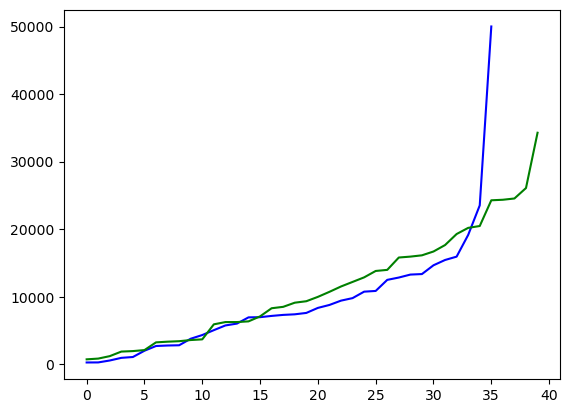

In [25]:
import matplotlib.pyplot as plt
modlen = sorted(mod_texts['ReportText'].tolist())
nomodlen = sorted(nomod_texts['ReportText'].tolist())
plt.plot(modlen, 'b')
plt.plot(nomodlen, 'g')